# <center> <u> Naive Bayes </u> </center> 

In [1]:
import numpy as np 
import pandas as pd 

from numba import jit 

import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
sns.set_theme(
    context = "notebook",
    style = "darkgrid", 
    palette = "bright",
)

sns.set(rc = {'figure.figsize':(10, 5)})

## <center> Generate Synthetic Data </center> 

In [3]:
N = 1000
P = np.linspace(0.01, 0.99, N)
defaults = np.zeros(N)

for i, p in enumerate(P):
    
    rv = np.random.uniform(0, 1)
    defaults[i] = [1 if rv < p else 0][0]

## <center> Logistic Function </center>

## <center> $ p(x) = \frac{1}{1 + e^{-(x - \mu) / s}} $ </center> 

## <center> $ \mu = -\frac{\beta_{0}}{\beta_{1}}, s = \frac{1}{\beta_{1}} $ </center> 

## <center> $ p(x) = \frac{1}{1 + e^{-(\beta_{0} + \beta_{1} x)}} $ </center> 

## <center> $ \beta_{0} = -\frac{\mu}{s}, \beta_{1} = \frac{1}{s} $ </center>

In [4]:
@jit(nopython = True)
def logistic_function(x, mu, s):
    """
    
    """
    
    return 1 / (1 + np.exp(-(x - mu) / s))

In [5]:
x = np.linspace(0.01, 0.99, N)
y = logistic_function(x, mu = 0.5, s = 1/10)

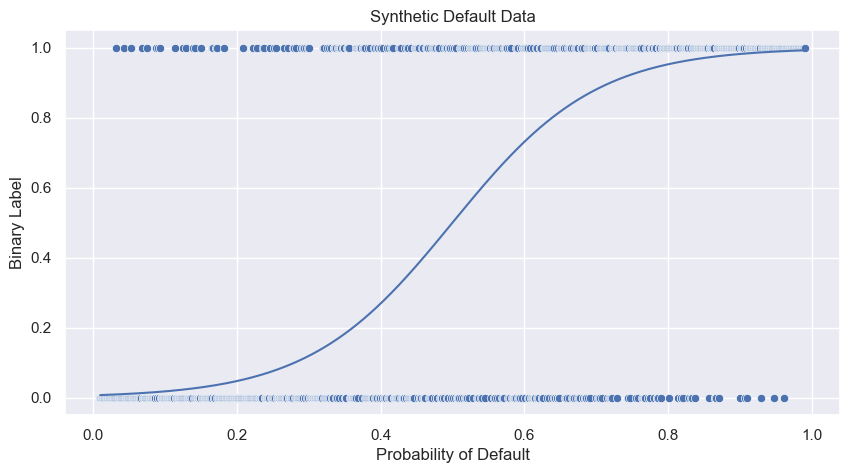

In [6]:
ax = sns.lineplot(
    x = x,
    y = y
)

ax.set(
    title = "Logistic Function"
)

sns.scatterplot(
    x = P,
    y = defaults
)

ax.set(
    title = "Synthetic Default Data",
    xlabel = "Probability of Default",
    ylabel = "Binary Label",
)

plt.show()

## <center> Bayes Theorem </center> 

## <center> $ p(C_{k} | x) = \frac{p(C_{k}) p(x | C_{k})}{p(x)} $ </center> 

## <center> Optimization </center> 

## <center> $ p(C_{k}) \prod_{i=1}^{N} p(x_{i} | C_{k}) $ </center>